In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import tensorflow as tf
import cv2
from google.cloud import storage
import io
from PIL import Image

from model.image_utils import *

In [2]:
path = '/home/ecbm4040/data/celebA'
images = load_images_from_local(path, False, 1000)

In [3]:
#check the number of images 
len(images)

202599

In [4]:
## Add noise
image_noise = add_noise(images, 1, 5)

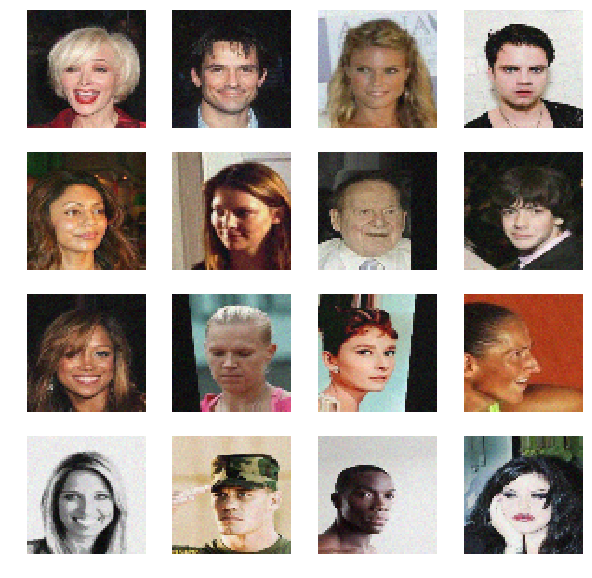

In [5]:
#visualize the preprocessed images

#convert the images back to 0-255 for visualization 
images2 = [cv2.normalize(i, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F).astype(np.uint8) 
           for i in image_noise]
img_col = ImageCollector(np.asarray(images2))
img_col.show(np.asarray(images2))

In [6]:
# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2
#train the model - generator and discriminator 
from model.dcgan import DCGAN

tf.reset_default_graph()
dcgan = DCGAN(batch_size=128,
              z_dim=100,
              model_name='DCGAN',
              data_source='CelebA',
              z_dist='norm')
dcgan.train(image_noise, learning_rate=0.0002, iters=1500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
conv_0_(128, 4, 4, 512)
conv_0_norm_(128, 4, 4, 512)
conv_0_relu_(128, 4, 4, 512)
conv_1_(128, 8, 8, 256)
conv_1_norm_(128, 8, 8, 256)
conv_1_relu_(128, 8, 8, 256)
conv_2_(128, 16, 16, 128)
conv_2_norm_(128, 16, 16, 128)
conv_2_relu_(128, 16, 16, 128)
conv_3_(128, 32, 32, 64)
conv_3_norm_(128, 32, 32, 64)
conv_3_relu_(128, 32, 32, 64)
conv_4_(128, 64, 64, 3)
(128, 64, 64, 3)
(128, 64, 64, 3)
Building my DCGAN
X_train size 202599
new size 202599
Step: 0, D_loss: 1.3863005638122559, G_loss: 0.5464045405387878
Step: 100, D_loss: 0.03830067068338394, G_loss: 6.717913627624512
Step: 200, D_loss: 0.07114075869321823, G_loss: 5.9331254959106445
Step: 300, D_loss: 0.27137091755867004, G_loss: 5.75944709777832
Step: 400, D_loss: 0.43218791484832764, G_loss: 4.287720680236816
Step: 500, D_loss: 0.6067537069320679, G_loss: 5.5796918869018555
Step: 600, D_loss: 0.7233499884605408, G_loss: 16.556102752685547
Ste

In [7]:
# show the graph
from model.cnn_jupyter_tensorboard import show_graph 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('../CelebA/checkpoints/DCGAN.ckpt.meta')
    graph = tf.get_default_graph()
    show_graph(graph)
    

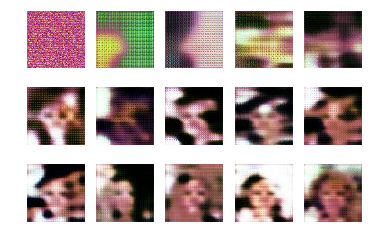

In [4]:
from model.image_utils import *
path = '../CelebA/results/'
pretty_viz(path, 'celeba_gen', path)